<a href="https://colab.research.google.com/github/brijgandhi/Machine-learning-and-Deep-learning/blob/main/Dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libs
import pandas as pd
import numpy as np


#Create some dummy data
df = pd.DataFrame({
    'id' : [1,2,3,4] ,
    'Name' : ['Ana','Paul','Marc','Ali'] 
})

print(df)


   id  Name
0   1   Ana
1   2  Paul
2   3  Marc
3   4   Ali


In [ ]:
#Import LabelEncoder from sklearn / DataFrameMapper from sklearn_pandas
from sklearn.preprocessing import LabelEncoder
#!pip install sklearn
from sklearn_pandas import DataFrameMapper

encoders = [(["Name"], LabelEncoder())]
mapper = DataFrameMapper(encoders, df_out=True)
label_col = mapper.fit_transform(df.copy())
df_3 = pd.concat([df.drop(columns=["Name"]), label_col], axis="columns")
print (df_3)

   id  Name
0   1     1
1   2     3
2   3     2
3   4     0


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
!pip install Faker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 26.5 MB/s 


In [ ]:
!pip install anonymizedf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

# Anonymizer Packages

# Anonymize DF
from anonymizedf.anonymizedf import anonymize
# Scrambler
from random import shuffle
# Faker
from faker import Faker
faker = Faker()

import warnings
warnings.filterwarnings("ignore")

In [ ]:
faker.name()

'Dawn Maldonado'

In [ ]:
fake_names = [faker.name() for x in range (10)]
df = pd.DataFrame(fake_names, columns = ['Student'])
# Generate random test scores
import numpy as np
df['TestScore'] = np.random.randint(50, 100, df.shape[0])
# Export to CSV
df.to_csv('StudentTestScores.csv', index=False)

df

,Student,TestScore
0,Stephen Morrison,90
1,Angel May,82
2,Christian Cabrera,58
3,Ronald Carlson,68
4,Cindy Bryant,62
5,James Buchanan,90
6,Anthony Clark,58
7,Mary Shaffer,81
8,Jillian Gonzalez,57
9,Adam Smith,76


In [ ]:
diff = anonymize(df)
# AnonymizeDF can generate fake names
diff.fake_names("Student")

,Student,TestScore,Fake_Student
0,Stephen Morrison,90,Jay Wright-Smith
1,Angel May,82,Dr Chloe Smith
2,Christian Cabrera,58,Arthur McCarthy
3,Ronald Carlson,68,Mr Dean Wood
4,Cindy Bryant,62,Mr Alan Baker
5,James Buchanan,90,Albert Smith
6,Anthony Clark,58,Maurice Jones
7,Mary Shaffer,81,Stephen Greenwood
8,Jillian Gonzalez,57,Owen Brookes-Cooke
9,Adam Smith,76,Dennis Berry


In [ ]:
diff.fake_ids("Student")

,Student,TestScore,Fake_Student
0,Stephen Morrison,90,ZJGD31341763535846
1,Angel May,82,LTOT78900546271840
2,Christian Cabrera,58,HXRI44772065458555
3,Ronald Carlson,68,CMTY66911658916892
4,Cindy Bryant,62,MZYS84578932629717
5,James Buchanan,90,LNEL61557160661669
6,Anthony Clark,58,VIUN85926561899677
7,Mary Shaffer,81,XIRS31382032014803
8,Jillian Gonzalez,57,VMNA38025216563324
9,Adam Smith,76,MLMC03308701573256


In [ ]:
diff.fake_categories("Student")

,Student,TestScore,Fake_Student
0,Stephen Morrison,90,Student 1
1,Angel May,82,Student 2
2,Christian Cabrera,58,Student 3
3,Ronald Carlson,68,Student 4
4,Cindy Bryant,62,Student 5
5,James Buchanan,90,Student 6
6,Anthony Clark,58,Student 7
7,Mary Shaffer,81,Student 8
8,Jillian Gonzalez,57,Student 9
9,Adam Smith,76,Student 10


In [ ]:
df = df.drop(columns=['Fake_Student'])
faker = Faker()
Faker.seed(4321)
dict_names = {name: faker.name() for name in df['Student'].unique()}
df['New Student Name'] = df['Student'].map(dict_names)
df

,Student,TestScore,New Student Name
0,Stephen Morrison,90,Jason Brown
1,Angel May,82,Jacob Stein
2,Christian Cabrera,58,Cody Brown
3,Ronald Carlson,68,Larry Morales
4,Cindy Bryant,62,Jessica Hendricks
5,James Buchanan,90,Brian Moore
6,Anthony Clark,58,Scott Baker
7,Mary Shaffer,81,Ruth Hoffman
8,Jillian Gonzalez,57,Daniel George
9,Adam Smith,76,David Moody


In [ ]:
print(faker.address())

# Faker can also generate random text
print(faker.text())


54933 Sanchez Circles
Randallmouth, MN 86691
Federal lot next senior. Final artist series attorney office house institution month. Course TV music sort base.


In [ ]:
df = df.drop(columns=['New Student Name'])
# Create a scrambler function
def word_scrambler(word):
    word = list(word)
    shuffle(word)
    return ''.join(word)
df['ScrambledName'] = df.Student.apply(word_scrambler)
df['ScrambledName'] = df['ScrambledName'].str.replace(" ","")
df

,Student,TestScore,ScrambledName
0,Stephen Morrison,90,rrponeMhSioetsn
1,Angel May,82,neaAMgly
2,Christian Cabrera,58,enCiCarsirrtbhaa
3,Ronald Carlson,68,CnlslarnoRado
4,Cindy Bryant,62,rdantyyCnBi
5,James Buchanan,90,amaJhuBaecnsn
6,Anthony Clark,58,aCnAknyohtrl
7,Mary Shaffer,81,hMafSayferr
8,Jillian Gonzalez,57,liGalielJnzazon
9,Adam Smith,76,tShmAdami


In [ ]:
df = df.drop(columns=['ScrambledName'])
# Create the Fake Student Names
anon = anonymize(df)
anon.fake_names('Student')

# Create a "Key"
dfKey = df[['Student', 'Fake_Student']]
dfKey.to_csv('key.csv')

df = df.assign(Student = df['Fake_Student'])
df = df.drop(columns='Fake_Student')

df

,Student,TestScore
0,Raymond Wilson,90
1,Ashleigh Griffiths,82
2,Suzanne Rose,58
3,Ms Emily Nelson,68
4,Victoria Ryan-Wyatt,62
5,Luke Coles,90
6,Hugh Jordan,58
7,Mr Robin Jones,81
8,Geraldine Davies,57
9,Dr Luke Johnston,76


In [ ]:
# Load in the decoder key
dfKey = pd.read_csv('key.csv')
# Return to the original Data
df['Student'] = df['Student'].map(dfKey.set_index('Fake_Student')['Student'])

In [ ]:
df

,Student,TestScore
0,Stephen Morrison,90
1,Angel May,82
2,Christian Cabrera,58
3,Ronald Carlson,68
4,Cindy Bryant,62
5,James Buchanan,90
6,Anthony Clark,58
7,Mary Shaffer,81
8,Jillian Gonzalez,57
9,Adam Smith,76


In [ ]:
import pandas as pd
import hashlib
df = pd.read_csv('/content/StudentTestScores.csv')
df['Student'] = df['Student'].astype(str)
# Apply hashing function to the column
df['Student_hash'] = df['Student'].apply(
    lambda x: 
        hashlib.sha256(x.encode()).hexdigest()
)

df['Student'] = df['Student_hash']
df

,Student,TestScore,Student_hash
0,d2fe3805d757ddeefa2da014cd55ef513d7d72d786a9f3...,90,d2fe3805d757ddeefa2da014cd55ef513d7d72d786a9f3...
1,6a18404b86157adfe9f4c0e4d2f0cd5788873034a45359...,82,6a18404b86157adfe9f4c0e4d2f0cd5788873034a45359...
2,4c55a031ed85303ed553163c9eae34906729cb438d2df7...,58,4c55a031ed85303ed553163c9eae34906729cb438d2df7...
3,0299355cde7205b5be58e266e726c9ce8d79fd552ea561...,68,0299355cde7205b5be58e266e726c9ce8d79fd552ea561...
4,20a716bea607ca09afc932aef996fe54289859a6fd767f...,62,20a716bea607ca09afc932aef996fe54289859a6fd767f...
5,f9c5b716bb422de7d34cb1d761ef3a7bf245f2e623ab5d...,90,f9c5b716bb422de7d34cb1d761ef3a7bf245f2e623ab5d...
6,fbd1c527faf74827b6ec6357b9090a1d9863d8eb8f5d1f...,58,fbd1c527faf74827b6ec6357b9090a1d9863d8eb8f5d1f...
7,6af299d64f23cda5d71e00b53b48aeb0ee73945f2819ca...,81,6af299d64f23cda5d71e00b53b48aeb0ee73945f2819ca...
8,6c81451d3f1f616a1d817919386fdd8892c332df9d6406...,57,6c81451d3f1f616a1d817919386fdd8892c332df9d6406...
9,3db67c85ce1a968e7a45873dfe6faf102c957631ea6511...,76,3db67c85ce1a968e7a45873dfe6faf102c957631ea6511...


USING HASH LIBRARY AND PANDAS

In [ ]:
import pandas as pd
import hashlib

df = pd.read_csv('/content/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [ ]:
df['CLIENTNUM'] = df['CLIENTNUM'].astype(str)
# Apply hashing function to the column
df['CLIENTNUM_HASH'] = df['CLIENTNUM'].apply(
    lambda x: 
        hashlib.sha256(x.encode()).hexdigest()
)

In [ ]:
df['CLIENTNUM_HASH']

0        c9bbef56f9d8292cb3cfa8ae91f9b9167390e6e4b514d5...
1        7996e2340d70489252370a5df035ec99381c8344cc3511...
2        6fb53dbc743724e086243b5bc288df62b4a6dc1b8bde92...
3        f86b86a1047317685f29c399059b199858685faf5ec6a8...
4        0d239470b0cb57e110cf60bc3865344ee2cdced6e3acdc...
                               ...                        
10122    5d74fc2a096fd2cff997508f7c9113a536baedde263ea6...
10123    3bc4758c36022672c79630afa3a75383a68c424670a890...
10124    c5b0077515f55ffa6eb3d8e36432bbf1e550a835e53193...
10125    c92e42249aeab9893aa98f8ed824361447e005a1805bd8...
10126    fd6700f076addd734bdb51b40adda26805839ccd3e66f6...
Name: CLIENTNUM_HASH, Length: 10127, dtype: object

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.corpus import stopwords
stop = stopwords.words('english')

sentence = input("Enter sentence:")

def ie_preprocess(sentence):
    document = ' '.join([i for i in sentence.split() if i not in stop])
    sentences = nltk.sent_tokenize(document)
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    sentences = [nltk.pos_tag(sent) for sent in sentences]
    return sentences

def extract_names(sentence):
    names = []
    sentences = ie_preprocess(sentence)
    for tagged_sentence in sentences:
        for chunk in nltk.ne_chunk(tagged_sentence):
            if type(chunk) == nltk.tree.Tree:
                if chunk.label() == 'PERSON':
                    names.append(' '.join([c[0] for c in chunk]))
    return names

if __name__ == '__main__':
    names = extract_names(sentence)

print(names)

from anonymizedf.anonymizedf import anonymize
from faker import Faker
faker = Faker()

d1 = names
print (d1)

from faker import Faker
faker = Faker()
from anonymizedf.anonymizedf import anonymize
import pandas as pd



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


Enter sentence:William is a professor.
['William']
['William']


In [ ]:
import pandas as pd
df = pd.read_fwf('textnews.txt')
df.to_csv('textnews.csv')

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.corpus import stopwords
stop = stopwords.words('english')

string = """
Michael Howard, the former Conservative Party leader, has told members of the cabinet to “consider their positions” as he said that Boris Johnson should resign. Howard — who led the party from 2003 to 2005 in opposition and is now a peer, Lord Howard of Lympne — told World at One on BBC Radio 4: “The party and more importantly the country would be better off under new leadership. Members of the cabinet should very carefully consider their positions. The comments will add further pressure to the prime minister after Oliver Dowden resigned as Conservative Party chairman this morning after the big defeats for the Tories in the by-elections in Wakefield and Tiverton & Honiton. Sir Geoffrey Clifton-Brown, MP for the Cotswolds and treasurer of the 1922 Committee of Tory backbenchers, urged Johnson to cut short his visit to Rwanda, where he is attending the Commonwealth summit, and set out for his party how he is going to fix the crisis it finds itself in. Clifton-Brown told Times Radio that backbenchers could still consider “whether we should trigger a leadership contest”, despite Johnson surviving a confidence vote at the start of this month. The present rules of the committee mean that Johnson cannot face another challenge for a year. Dowden, who was seen as an ally of the prime minister, said in his letter of resignation that Conservative supporters were distressed and disappointed by recent events. In Tiverton & Honiton, in Devon, Richard Foord of the Liberal Democrats overturned a majority of more than 24,000, making it the biggest Conservative margin overturned in a British by-election. The record was previously held by Labour, after the party won in Liverpool Wavertree in 1935, where the Tory majority had been 23,972.
"""

def ie_preprocess(document):
    document = ' '.join([i for i in document.split() if i not in stop])
    sentences = nltk.sent_tokenize(document)
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    sentences = [nltk.pos_tag(sent) for sent in sentences]
    return sentences

def extract_names(document):
    names = []
    sentences = ie_preprocess(document)
    for tagged_sentence in sentences:
        for chunk in nltk.ne_chunk(tagged_sentence):
            if type(chunk) == nltk.tree.Tree:
                if chunk.label() == 'PERSON':
                    names.append(' '.join([c[0] for c in chunk]))
    return names

if __name__ == '__main__':
    names = extract_names(string)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


SPACY LIBRARY OF PYTHON

In [ ]:
import spacy

# load english language model
nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])

text = "Michael Howard, the former Conservative Party leader, has told members of the cabinet to “consider their positions” as he said that Boris Johnson should resign. Howard — who led the party from 2003 to 2005 in opposition and is now a peer, Lord Howard of Lympne — told World at One on BBC Radio 4: “The party and more importantly the country would be better off under new leadership. Members of the cabinet should very carefully consider their positions. The comments will add further pressure to the prime minister after Oliver Dowden resigned as Conservative Party chairman this morning after the big defeats for the Tories in the by-elections in Wakefield and Tiverton & Honiton. Sir Geoffrey Clifton-Brown, MP for the Cotswolds and treasurer of the 1922 Committee of Tory backbenchers, urged Johnson to cut short his visit to Rwanda, where he is attending the Commonwealth summit, and set out for his party how he is going to fix the crisis it finds itself in. Clifton-Brown told Times Radio that backbenchers could still consider “whether we should trigger a leadership contest”, despite Johnson surviving a confidence vote at the start of this month. The present rules of the committee mean that Johnson cannot face another challenge for a year. Dowden, who was seen as an ally of the prime minister, said in his letter of resignation that Conservative supporters were distressed and disappointed by recent events. In Tiverton & Honiton, in Devon, Richard Foord of the Liberal Democrats overturned a majority of more than 24,000, making it the biggest Conservative margin overturned in a British by-election. The record was previously held by Labour, after the party won in Liverpool Wavertree in 1935, where the Tory majority had been 23,972."

# create spacy 
doc = nlp(text)

for token in doc:
    print(token.text,'->',token.pos_)

Michael -> PROPN
Howard -> PROPN
, -> PUNCT
the -> DET
former -> ADJ
Conservative -> PROPN
Party -> PROPN
leader -> NOUN
, -> PUNCT
has -> AUX
told -> VERB
members -> NOUN
of -> ADP
the -> DET
cabinet -> NOUN
to -> PART
“ -> PUNCT
consider -> VERB
their -> PRON
positions -> NOUN
” -> PUNCT
as -> SCONJ
he -> PRON
said -> VERB
that -> SCONJ
Boris -> PROPN
Johnson -> PROPN
should -> AUX
resign -> VERB
. -> PUNCT
Howard -> PROPN
— -> PUNCT
who -> PRON
led -> VERB
the -> DET
party -> NOUN
from -> ADP
2003 -> NUM
to -> ADP
2005 -> NUM
in -> ADP
opposition -> NOUN
and -> CCONJ
is -> AUX
now -> ADV
a -> DET
peer -> NOUN
, -> PUNCT
Lord -> PROPN
Howard -> PROPN
of -> ADP
Lympne -> PROPN
— -> PUNCT
told -> VERB
World -> PROPN
at -> ADP
One -> NUM
on -> ADP
BBC -> PROPN
Radio -> PROPN
4 -> NUM
: -> PUNCT
“ -> PUNCT
The -> DET
party -> NOUN
and -> CCONJ
more -> ADV
importantly -> ADV
the -> DET
country -> NOUN
would -> AUX
be -> AUX
better -> ADJ
off -> ADP
under -> ADP
new -> ADJ
leadership -> NO

In [ ]:
from spacy import displacy 
displacy.render(doc, style='dep',jupyter=True)

In [ ]:
for token in doc:
    # extract subject
    if (token.dep_=='nsubj'):
        print(token.text)
    # extract object
    elif (token.dep_=='dobj'):
        print(token.text)

Howard
members
positions
he
Johnson
Howard
who
party
World
party
country
Members
positions
comments
pressure
Dowden
Brown
Johnson
visit
he
summit
he
crisis
it
itself
Brown
Radio
backbenchers
we
contest
Johnson
vote
rules
Johnson
challenge
Dowden
supporters
majority
it
margin
party
majority


In [ ]:
for token in doc:
    # check token pos
    if token.pos_=='PROPN':
        # print token
        print(token.text)
    if token.pos_=='PUNCT':
      print(token.text)
    elif (token.pos_=='ADJ'):
      print(token.text)

Michael
Howard
,
former
Conservative
Party
,
“
”
Boris
Johnson
.
Howard
—
,
Lord
Howard
Lympne
—
World
BBC
Radio
:
“
better
new
.
.
further
prime
Oliver
Dowden
Conservative
Party
big
Tories
-
Wakefield
Tiverton
Honiton
.
Sir
Geoffrey
Clifton
-
Brown
,
MP
Cotswolds
Committee
Tory
,
Johnson
short
Rwanda
,
Commonwealth
,
.
Clifton
-
Brown
Times
Radio
“
”
,
Johnson
.
present
Johnson
.
Dowden
,
prime
,
Conservative
distressed
recent
.
Tiverton
Honiton
,
Devon
,
Richard
Foord
Liberal
Democrats
more
,
biggest
Conservative
British
-
.
Labour
,
Liverpool
Wavertree
,
Tory
.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

for token in doc:
  if not token.pos_=='PROPN' and not token.pos_=='PUNCT' and not token.pos_=='ADJ':
    safewords = token.text
    print(safewords)

the
leader
has
told
members
of
the
cabinet
to
consider
their
positions
as
he
said
that
should
resign
who
led
the
party
from
2003
to
2005
in
opposition
and
is
now
a
peer
of
told
at
One
on
4
The
party
and
more
importantly
the
country
would
be
off
under
leadership
Members
of
the
cabinet
should
very
carefully
consider
their
positions
The
comments
will
add
pressure
to
the
minister
after
resigned
as
chairman
this
morning
after
the
defeats
for
the
in
the
by
elections
in
and
&
for
the
and
treasurer
of
the
1922
of
backbenchers
urged
to
cut
his
visit
to
where
he
is
attending
the
summit
and
set
out
for
his
party
how
he
is
going
to
fix
the
crisis
it
finds
itself
in
told
that
backbenchers
could
still
consider
whether
we
should
trigger
a
leadership
contest
despite
surviving
a
confidence
vote
at
the
start
of
this
month
The
rules
of
the
committee
mean
that
can
not
face
another
challenge
for
a
year
who
was
seen
as
an
ally
of
the
minister
said
in
his
letter
of
resignation
that
supporters
were
and
disapp

In [ ]:
safewords = []
for token in doc:
  if not token.pos_=='PROPN' and not token.pos_=='PUNCT' and not token.pos_=='ADJ':
    safewords.append(token.text)

In [ ]:
print(safewords)

['the', 'leader', 'has', 'told', 'members', 'of', 'the', 'cabinet', 'to', 'consider', 'their', 'positions', 'as', 'he', 'said', 'that', 'should', 'resign', 'who', 'led', 'the', 'party', 'from', '2003', 'to', '2005', 'in', 'opposition', 'and', 'is', 'now', 'a', 'peer', 'of', 'told', 'at', 'One', 'on', '4', 'The', 'party', 'and', 'more', 'importantly', 'the', 'country', 'would', 'be', 'off', 'under', 'leadership', 'Members', 'of', 'the', 'cabinet', 'should', 'very', 'carefully', 'consider', 'their', 'positions', 'The', 'comments', 'will', 'add', 'pressure', 'to', 'the', 'minister', 'after', 'resigned', 'as', 'chairman', 'this', 'morning', 'after', 'the', 'defeats', 'for', 'the', 'in', 'the', 'by', 'elections', 'in', 'and', '&', 'for', 'the', 'and', 'treasurer', 'of', 'the', '1922', 'of', 'backbenchers', 'urged', 'to', 'cut', 'his', 'visit', 'to', 'where', 'he', 'is', 'attending', 'the', 'summit', 'and', 'set', 'out', 'for', 'his', 'party', 'how', 'he', 'is', 'going', 'to', 'fix', 'the', 

In [ ]:
import random
word = random.sample(safewords, 226)
print(word)

['under', 'cabinet', 'should', 'can', 'seen', 'his', 'been', 'and', 'of', 'another', 'held', 'to', 'said', '4', 'not', 'after', 'party', 'consider', 'has', 'will', 'defeats', 'In', 'the', 'visit', 'The', 'as', 'an', 'whether', 'pressure', 'of', 'he', 'consider', 'resigned', 'could', 'start', 'trigger', 'than', '23,972', 'of', 'going', 'now', 'the', 'challenge', 'we', 'election', 'treasurer', 'had', 'by', 'how', 'cabinet', 'who', 'is', 'a', 'and', 'in', 'despite', 'to', 'this', 'after', 'rules', 'the', 'a', 'a', 'this', 'at', 'confidence', 'and', 'overturned', 'it', 'of', 'to', 'The', 'leader', 'party', 'contest', 'opposition', 'elections', 'mean', 'very', 'the', 'One', 'attending', 'of', 'who', 'of', 'off', 'party', 'of', 'told', 'importantly', 'his', 'add', 'for', 'more', 'as', 'Members', 'in', 'vote', 'party', 'positions', 'members', 'he', 'for', 'the', 'at', 'the', 'of', 'and', 'carefully', 'margin', 'their', 'his', 'of', 'for', 'in', 'itself', 'a', 'in', 'where', 'of', 'should', 'c

In [ ]:
sentence12 = " ".join(safewords)
print(sentence12)

the leader has told members of the cabinet to consider their positions as he said that should resign who led the party from 2003 to 2005 in opposition and is now a peer of told at One on 4 The party and more importantly the country would be off under leadership Members of the cabinet should very carefully consider their positions The comments will add pressure to the minister after resigned as chairman this morning after the defeats for the in the by elections in and & for the and treasurer of the 1922 of backbenchers urged to cut his visit to where he is attending the summit and set out for his party how he is going to fix the crisis it finds itself in told that backbenchers could still consider whether we should trigger a leadership contest despite surviving a confidence vote at the start of this month The rules of the committee mean that can not face another challenge for a year who was seen as an ally of the minister said in his letter of resignation that supporters were and disapp

In [ ]:
sentence13 = " ".join(word)
print(sentence13)

under cabinet should can seen his been and of another held to said 4 not after party consider has will defeats In the visit The as an whether pressure of he consider resigned could start trigger than 23,972 of going now the challenge we election treasurer had by how cabinet who is a and in despite to this after rules the a a this at confidence and overturned it of to The leader party contest opposition elections mean very the One attending of who of off party of told importantly his add for more as Members in vote party positions members he for the at the of and carefully margin their his of for in itself a in where of should comments by led set majority in by face is backbenchers the in to won making to the peer the year 1922 backbenchers their the the committee from as resignation by in & a positions ally leadership be previously to the was The that the a the for said surviving disappointed is on events told consider 24,000 where overturned minister still that morning finds and in th

In [ ]:
import spacy
sp = spacy.load('en_core_web_sm')
print(sp.Defaults.stop_words)


{'my', 'are', 'least', 'hereupon', 'yourselves', 'another', 'via', 'from', 'no', 'he', 'few', 'does', 'perhaps', 'around', 'ours', 'everywhere', 'whom', 're', 'were', 'herself', 'bottom', 'thereupon', 'do', 'themselves', 'a', 'part', 'even', 'hence', 'only', 'whatever', 'nothing', 'done', 'quite', 'just', 'twelve', 'until', 'and', 'wherein', 'latterly', 'there', "'m", 'noone', 'among', 'made', 'formerly', 'though', 'meanwhile', 'anyone', 'most', 'call', "'d", 'because', 'any', '’ll', 'however', 'six', 'while', '‘re', 'wherever', 'out', 'someone', 'yours', '’re', 'many', 'whose', 'than', 'somehow', 'of', 'moreover', 'have', 'when', '’d', 'serious', 'them', 'but', 'therefore', 'ca', 'himself', 'whoever', 'alone', 'put', 'regarding', 'along', 'now', 'latter', 'becomes', 'fifteen', 'get', 'towards', 'sometime', '’s', 'nine', 'yet', 'itself', 'hundred', 'seeming', 'unless', 'up', 'in', 'two', 'ourselves', 'keep', 'did', 'amongst', 'against', 'this', 'our', 'had', 'except', 'her', 'front', '

In [ ]:
counter = 0
for item in safewords:
  counter = counter + 1
  size = len(safewords)
print("the length is:"+ str(counter))

the length is:226


In [ ]:
tokenwords = []
for token in doc:
  tokenwords.append(token.text)

In [ ]:
print(tokenwords)

['Michael', 'Howard', ',', 'the', 'former', 'Conservative', 'Party', 'leader', ',', 'has', 'told', 'members', 'of', 'the', 'cabinet', 'to', '“', 'consider', 'their', 'positions', '”', 'as', 'he', 'said', 'that', 'Boris', 'Johnson', 'should', 'resign', '.', 'Howard', '—', 'who', 'led', 'the', 'party', 'from', '2003', 'to', '2005', 'in', 'opposition', 'and', 'is', 'now', 'a', 'peer', ',', 'Lord', 'Howard', 'of', 'Lympne', '—', 'told', 'World', 'at', 'One', 'on', 'BBC', 'Radio', '4', ':', '“', 'The', 'party', 'and', 'more', 'importantly', 'the', 'country', 'would', 'be', 'better', 'off', 'under', 'new', 'leadership', '.', 'Members', 'of', 'the', 'cabinet', 'should', 'very', 'carefully', 'consider', 'their', 'positions', '.', 'The', 'comments', 'will', 'add', 'further', 'pressure', 'to', 'the', 'prime', 'minister', 'after', 'Oliver', 'Dowden', 'resigned', 'as', 'Conservative', 'Party', 'chairman', 'this', 'morning', 'after', 'the', 'big', 'defeats', 'for', 'the', 'Tories', 'in', 'the', 'by

In [ ]:
counter = 0
for item in tokenwords:
  counter = counter + 1
  size = len(tokenwords)
print("the length is:"+ str(counter))

the length is:329


In [ ]:
import random
word786 = random.sample(tokenwords, 80)
print(word786)

sentence14 = " ".join(word786)
print(sentence14)

['prime', 'to', 'Foord', 'was', 'urged', 'overturned', 'it', ',', 'a', 'said', 'party', 'led', 'visit', 'cut', 'carefully', 'after', 'attending', 'the', 'were', '23,972', 'face', 'the', 'should', 'the', '“', 'their', 'a', ',', 'Conservative', 'Boris', 'where', 'where', 'challenge', 'the', 'his', 'resignation', 'cabinet', ',', 'can', '.', '.', 'minister', 'election', '1922', 'still', 'Party', '—', 'In', 'that', 'told', 'in', 'the', 'Geoffrey', 'Tiverton', ',', 'going', 'leadership', 'set', '”', 'biggest', 'members', 'leader', 'the', 'comments', 'he', 'add', 'morning', 'making', 'will', 'won', 'for', 'in', 'could', 'cabinet', 'is', 'his', 'treasurer', 'country', 'the', 'surviving']
prime to Foord was urged overturned it , a said party led visit cut carefully after attending the were 23,972 face the should the “ their a , Conservative Boris where where challenge the his resignation cabinet , can . . minister election 1922 still Party — In that told in the Geoffrey Tiverton , going leaders

In [ ]:
wopunc = []
for token in doc:
  if not token.pos_=='PUNCT':
    wopunc.append(token.text)
print(wopunc)

['Michael', 'Howard', 'the', 'former', 'Conservative', 'Party', 'leader', 'has', 'told', 'members', 'of', 'the', 'cabinet', 'to', 'consider', 'their', 'positions', 'as', 'he', 'said', 'that', 'Boris', 'Johnson', 'should', 'resign', 'Howard', 'who', 'led', 'the', 'party', 'from', '2003', 'to', '2005', 'in', 'opposition', 'and', 'is', 'now', 'a', 'peer', 'Lord', 'Howard', 'of', 'Lympne', 'told', 'World', 'at', 'One', 'on', 'BBC', 'Radio', '4', 'The', 'party', 'and', 'more', 'importantly', 'the', 'country', 'would', 'be', 'better', 'off', 'under', 'new', 'leadership', 'Members', 'of', 'the', 'cabinet', 'should', 'very', 'carefully', 'consider', 'their', 'positions', 'The', 'comments', 'will', 'add', 'further', 'pressure', 'to', 'the', 'prime', 'minister', 'after', 'Oliver', 'Dowden', 'resigned', 'as', 'Conservative', 'Party', 'chairman', 'this', 'morning', 'after', 'the', 'big', 'defeats', 'for', 'the', 'Tories', 'in', 'the', 'by', 'elections', 'in', 'Wakefield', 'and', 'Tiverton', '&', '

In [ ]:
counter = 0
for item in wopunc:
  counter = counter + 1
  size = len(wopunc)
print("the length is:"+ str(counter))


the length is:292


In [ ]:
import random
word86 = random.sample(wopunc, 200)
print(word86)

sentence15 = " ".join(word86)
print(sentence15)

['the', 'itself', 'overturned', 'he', 'backbenchers', 'and', 'chairman', 'Tories', 'of', 'defeats', 'comments', '&', 'Foord', 'this', '4', 'One', 'the', 'Rwanda', 'to', 'and', 'Party', 'of', 'of', 'to', 'had', 'present', 'party', 'ally', 'was', 'will', 'the', 'seen', 'at', 'more', 'is', 'whether', '24,000', 'their', 'said', 'The', '2003', 'who', 'treasurer', 'resigned', 'that', 'vote', 'positions', 'Clifton', 'distressed', 'Members', 'summit', 'of', 'confidence', 'for', 'is', 'previously', 'the', 'a', 'Radio', 'the', 'Wavertree', 'in', 'MP', 'and', 'majority', 'a', 'still', 'consider', 'challenge', 'Richard', 'their', 'Johnson', 'Liberal', 'minister', 'leadership', 'been', 'it', 'party', 'were', 'surviving', 'start', 'The', 'despite', 'was', 'on', 'going', 'the', 'the', 'The', 'this', 'that', 'Johnson', 'Conservative', 'pressure', 'Conservative', 'Committee', 'told', 'contest', 'who', 'than', 'importantly', 'under', 'crisis', 'the', 'said', 'the', 'World', 'events', 'to', 'the', 'face'

In [ ]:
file_name = 'textnews.txt'
news_file_text = open(file_name).read()
news_file_doc = nlp(news_file_text)
# Extract tokens for the given doc
print ([token.text for token in news_file_doc])

counter = 0
for item in news_file_doc:
  counter = counter + 1
  size = len(news_file_doc)
print("the length is:"+ str(counter))

['Michael', 'Howard', ',', 'the', 'former', 'Conservative', 'Party', 'leader', ',', 'has', 'told', 'members', 'of', 'the', 'cabinet', 'to', 'consider', 'their', 'positions', 'as', 'he', 'said', 'that', 'Boris', 'Johnson', 'should', 'resign', '.', 'Howard', '—', 'who', 'led', 'the', 'party', 'from', '2003', 'to', '2005', 'in', 'opposition', 'and', 'is', 'now', 'a', 'peer', ',', 'Lord', 'Howard', 'of', 'Lympne', '—', 'told', 'World', 'at', 'One', 'on', 'BBC', 'Radio', '4', ':', '“', 'The', 'party', 'and', 'more', 'importantly', 'the', 'country', 'would', 'be', 'better', 'off', 'under', 'new', 'leadership', '.', 'Members', 'of', 'the', 'cabinet', 'should', 'very', 'carefully', 'consider', 'their', 'positions', '.', 'The', 'comments', 'will', 'add', 'further', 'pressure', 'to', 'the', 'prime', 'minister', 'after', 'Oliver', 'Dowden', 'resigned', 'as', 'Conservative', 'Party', 'chairman', 'this', 'morning', 'after', 'the', 'big', 'defeats', 'for', 'the', 'Tories', 'in', 'the', 'by', '-', 'e

In [ ]:
newwords345 = []
for token in news_file_doc:
  if not token.is_stop and not token.pos_=='PUNCT':
    newwords345.append(token)
print(newwords345)

[Michael, Howard, Conservative, Party, leader, told, members, cabinet, consider, positions, said, Boris, Johnson, resign, Howard, led, party, 2003, 2005, opposition, peer, Lord, Howard, Lympne, told, World, BBC, Radio, 4, party, importantly, country, better, new, leadership, Members, cabinet, carefully, consider, positions, comments, add, pressure, prime, minister, Oliver, Dowden, resigned, Conservative, Party, chairman, morning, big, defeats, Tories, elections, Wakefield, Tiverton, &, Honiton, Sir, Geoffrey, Clifton, Brown, MP, Cotswolds, treasurer, 1922, Committee, Tory, backbenchers, urged, Johnson, cut, short, visit, Rwanda, attending, Commonwealth, summit, set, party, going, fix, crisis, finds, Clifton, Brown, told, Times, Radio, backbenchers, consider, trigger, leadership, contest, despite, Johnson, surviving, confidence, vote, start, month, present, rules, committee, mean, Johnson, face, challenge, year, Dowden, seen, ally, prime, minister, said, letter, resignation, Conservativ

In [ ]:
import random
word101 = random.sample(newwords345, 10)
print(word101)

sentence29 = " ".join(map(str, word101))
print(sentence29)


[figures, reported, egress, Students, output, conversation, living, exposure, shameless, architectures]
figures reported egress Students output conversation living exposure shameless architectures


In [ ]:
from spacy import displacy
doc1 = nlp(sentence29)
displacy.render(doc1, style='dep',jupyter=True)

In [ ]:
file_name = 'textnews1.txt'
news_file_text1 = open(file_name).read()
news_file_doc1 = nlp(news_file_text1)
# Extract tokens for the given doc
for token in news_file_doc1:
  print(token.text, '=', token.pos_)


Streaming output truncated to the last 5000 lines.
propping = VERB
up = ADP
this = DET
failing = VERB
prime = ADJ
minister = NOUN
: = PUNCT
the = DET
Liberal = PROPN
Democrats = PROPN
are = AUX
coming = VERB
. = PUNCT
If = SCONJ
you = PRON
do = AUX
n’t = PART
take = VERB
action = NOUN
to = PART
restore = VERB
decency = NOUN
, = PUNCT
respect = NOUN
and = CCONJ
British = ADJ
values = NOUN
to = ADP
Downing = PROPN
Street = PROPN
, = PUNCT
you = PRON
too = ADV
will = AUX
face = VERB
election = NOUN
defeats = NOUN
like = ADP
the = DET
one = NOUN
we = PRON
have = AUX
seen = VERB
here = ADV
tonight = NOUN
. = PUNCT
It = PRON
is = AUX
time = NOUN
to = PART
do = VERB
what = PRON
’s = VERB
right = ADJ
for = ADP
our = PRON
country = NOUN
. = PUNCT
You = PRON
know = VERB
in = ADP
your = PRON
heart = NOUN
that = SCONJ
your = PRON
leader = NOUN
is = AUX
not = PART
the = DET
person = NOUN
to = PART
lead = VERB
this = DET
great = ADJ
nation = NOUN
into = ADP
the = DET
future = NOUN
. = PUNCT
Lifelong

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.corpus import stopwords
stop = stopwords.words('english')

a_list = nltk.tokenize.sent_tokenize(news_file_text1)
print(a_list)

['Michael Howard, the former Conservative Party leader, has told members of the cabinet to consider their positions as he said that Boris Johnson should resign.', 'Howard — who led the party from 2003 to 2005 in opposition and is now a peer, Lord Howard of Lympne — told World at One on BBC Radio 4: “The party and more importantly the country would be better off under new leadership.', 'Members of the cabinet should very carefully consider their positions.', 'The comments will add further pressure to the prime minister after Oliver Dowden resigned as Conservative Party chairman this morning after the big defeats for the Tories in the by-elections in Wakefield and Tiverton & Honiton.', 'Sir Geoffrey Clifton-Brown, MP for the Cotswolds and treasurer of the 1922 Committee of Tory backbenchers, urged Johnson to cut short his visit to Rwanda, where he is attending the Commonwealth summit, and set out for his party how he is going to fix the crisis it finds itself in.', 'Clifton-Brown told Ti

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
len(a_list)

273

In [ ]:
from spacy import displacy
doc1 = nlp(a_list[0])
displacy.render(doc1, style='dep',jupyter=True)

In [ ]:
from spacy import displacy
doc1 = nlp(a_list[1])
displacy.render(doc1, style='dep',jupyter=True)

In [ ]:
!pip install visualise_spacy_tree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


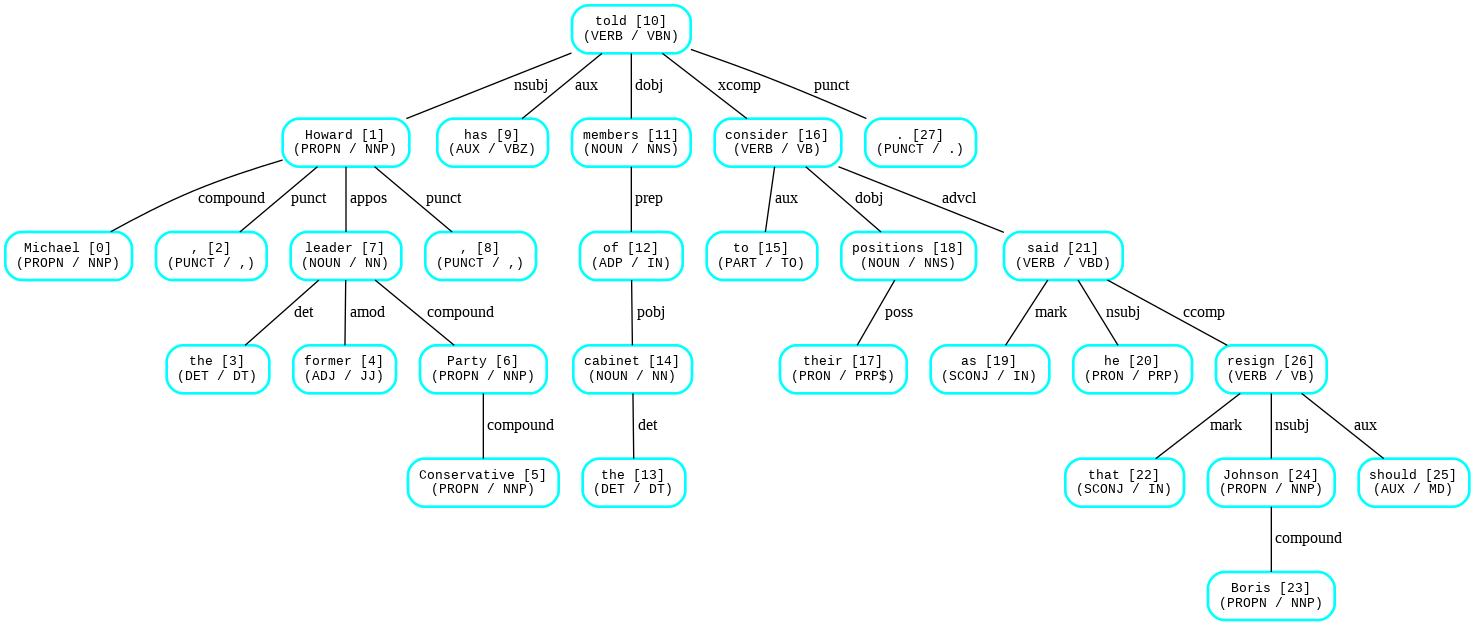

In [ ]:
import spacy
from spacy.matcher import Matcher 
from spacy import displacy 
import visualise_spacy_tree
from IPython.display import Image, display

doc = nlp(a_list[0])
png = visualise_spacy_tree.create_png(doc)
display(Image(png))


In [ ]:
safewordsnew1 = []
for token in news_file_doc1:
  if not token.pos_=='PROPN' and not token.pos_=='PUNCT':
    safewordsnew1.append(token.text)

print(safewordsnew1)

counter = 0
for item in safewordsnew1:
  counter = counter + 1
  size = len(safewordsnew1)
print("the length is:"+ str(counter))

ajoined = " ".join(safewordsnew1)
print(ajoined)

['the', 'former', 'leader', 'has', 'told', 'members', 'of', 'the', 'cabinet', 'to', 'consider', 'their', 'positions', 'as', 'he', 'said', 'that', 'should', 'resign', 'who', 'led', 'the', 'party', 'from', '2003', 'to', '2005', 'in', 'opposition', 'and', 'is', 'now', 'a', 'peer', 'of', 'told', 'at', 'One', 'on', '4', 'The', 'party', 'and', 'more', 'importantly', 'the', 'country', 'would', 'be', 'better', 'off', 'under', 'new', 'leadership', 'Members', 'of', 'the', 'cabinet', 'should', 'very', 'carefully', 'consider', 'their', 'positions', 'The', 'comments', 'will', 'add', 'further', 'pressure', 'to', 'the', 'prime', 'minister', 'after', 'resigned', 'as', 'chairman', 'this', 'morning', 'after', 'the', 'big', 'defeats', 'for', 'the', 'in', 'the', 'by', 'elections', 'in', 'and', '&', 'for', 'the', 'and', 'treasurer', 'of', 'the', '1922', 'of', 'backbenchers', 'urged', 'to', 'cut', 'short', 'his', 'visit', 'to', 'where', 'he', 'is', 'attending', 'the', 'summit', 'and', 'set', 'out', 'for', '

In [ ]:
import random
finalwords78 = random.sample(safewordsnew1, 27)
print(finalwords78)

finalsentence78 = " ".join(finalwords78)
print(finalsentence78)

Tphrase34 = random.sample(safewordsnew1, 40)
print(Tphrase34)
Tphrase43 = " ".join(Tphrase34)
print(Tphrase43)

Lphrase56 = random.sample(safewordsnew1, 50)
print(Lphrase56)
Lphrase65 = " ".join(Lphrase56)
print(Lphrase65)

['have', 'provides', 'shared', 'purely', 'a', 'identified', 'here', 'and', 'as', 'the', 'mechanisms', 'the', 'his', 'I', 'papers', 'at', 'disagree', 'here', 'suggests', 'to', 'concluded', 'are', 'section', 'next', 'evaluation', 'publish', 'as']
have provides shared purely a identified here and as the mechanisms the his I papers at disagree here suggests to concluded are section next evaluation publish as
['can', 'two', 'a', 'for', 'was', 'from', 'research', 'changed', 'commentator', 'Conservative', 'Restate', 'that', 'could', 'last', 'more', 'fail', 'of', 'bucket', 'a', 'in', 'and', 'voted', 'generate', 'of', 'used', 'shared', 'developing', 'from', 'is', 'continuum', 'various', 'Often', 'results', 'to', 'for', 'his', 'was', 'Factors', 'builders', 'told']
can two a for was from research changed commentator Conservative Restate that could last more fail of bucket a in and voted generate of used shared developing from is continuum various Often results to for his was Factors builders told

In [ ]:
#len(Tphrase43)
#len(a_list[0])
len(finalsentence78)

162

In [ ]:
!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 5.4 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149859 sha256=3d9471ebe496c0d345a56f66ab0f9de1ce0d5ba65d245c94cb5d99df28612410
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [ ]:
from Levenshtein import distance as lev
lev(a_list[0], finalsentence78)

#lev(a_list[0], Tphrase43)

126

In [ ]:
xtext1 = 'playing'
xtext2 = 'gaming'
lev(xtext1, xtext2)

3

In [ ]:
import numpy as np

def lev(item, finalsentence78):

    #create matrix of zeros
    len1=len(item)+1
    len2=len(finalsentence78)+1
    matrix = np.zeros((len1,len2))

    #number x and y indices in matrix
    for i in range(len1):
        matrix[i,0] = i
    for j in range(len2):
        matrix[0,j] = j
    
    #two for loops to compare strings letter by letter
    for i in range(1, len1):
        for j in range(1, len2):
            if item[i-1]==finalsentence78[j-1]:
                matrix[i,j] = min(
                matrix[i-1,j] + 1,
                matrix[i,j-1] + 1,
                matrix[i-1,j-1])
            else:
                matrix[i,j] = min(
                matrix[i-1,j] + 1,
                matrix[i-1,j-1] + 1,
                matrix[i,j-1] + 1)
    print(matrix)
    return(matrix[len1-1,len2-1])

In [ ]:
dis_list1 = []
for item in a_list:
  m=lev(item,finalsentence78)
  print('Levenshtein distance is:',m)
  dis_list1.append(m)

print(dis_list1)

[[  0.   1.   2. ... 160. 161. 162.]
 [  1.   1.   2. ... 160. 161. 162.]
 [  2.   2.   2. ... 159. 160. 161.]
 ...
 [156. 155. 154. ... 124. 125. 125.]
 [157. 156. 155. ... 125. 125. 126.]
 [158. 157. 156. ... 125. 126. 126.]]
Levenshtein distance is: 126.0
[[  0.   1.   2. ... 160. 161. 162.]
 [  1.   1.   2. ... 160. 161. 162.]
 [  2.   2.   2. ... 159. 160. 161.]
 ...
 [219. 218. 217. ... 168. 169. 170.]
 [220. 219. 218. ... 169. 169. 170.]
 [221. 220. 219. ... 170. 170. 170.]]
Levenshtein distance is: 170.0
[[  0.   1.   2. ... 160. 161. 162.]
 [  1.   1.   2. ... 160. 161. 162.]
 [  2.   2.   2. ... 159. 160. 161.]
 ...
 [ 68.  67.  66. ... 122. 123. 124.]
 [ 69.  68.  67. ... 121. 122. 123.]
 [ 70.  69.  68. ... 121. 122. 123.]]
Levenshtein distance is: 123.0
[[  0.   1.   2. ... 160. 161. 162.]
 [  1.   1.   2. ... 160. 161. 162.]
 [  2.   1.   2. ... 159. 160. 161.]
 ...
 [225. 224. 223. ... 156. 157. 158.]
 [226. 225. 224. ... 156. 157. 158.]
 [227. 226. 225. ... 157. 157. 15

In [ ]:
import numpy as np

def lev(item, Tphrase43):

    #create matrix of zeros
    len1=len(item)+1
    len2=len(Tphrase43)+1
    matrix = np.zeros((len1,len2))

    #number x and y indices in matrix
    for i in range(len1):
        matrix[i,0] = i
    for j in range(len2):
        matrix[0,j] = j
    
    #two for loops to compare strings letter by letter
    for i in range(1, len1):
        for j in range(1, len2):
            if item[i-1]==Tphrase43[j-1]:
                matrix[i,j] = min(
                matrix[i-1,j] + 1,
                matrix[i,j-1] + 1,
                matrix[i-1,j-1])
            else:
                matrix[i,j] = min(
                matrix[i-1,j] + 1,
                matrix[i-1,j-1] + 1,
                matrix[i,j-1] + 1)
    print(matrix)
    return(matrix[len1-1,len2-1])

In [ ]:
dis_list8 = []
for item in a_list:
  m=lev(item,Tphrase43)
  print('Levenshtein distance is:',m)
  dis_list8.append(m)

print(dis_list8)

[[  0.   1.   2. ... 233. 234. 235.]
 [  1.   1.   2. ... 233. 234. 235.]
 [  2.   2.   2. ... 232. 233. 234.]
 ...
 [156. 155. 154. ... 157. 158. 159.]
 [157. 156. 155. ... 157. 158. 159.]
 [158. 157. 156. ... 158. 158. 159.]]
Levenshtein distance is: 159.0
[[  0.   1.   2. ... 233. 234. 235.]
 [  1.   1.   2. ... 233. 234. 235.]
 [  2.   2.   2. ... 232. 233. 234.]
 ...
 [219. 218. 217. ... 179. 180. 181.]
 [220. 219. 218. ... 179. 180. 181.]
 [221. 220. 219. ... 180. 180. 181.]]
Levenshtein distance is: 181.0
[[  0.   1.   2. ... 233. 234. 235.]
 [  1.   1.   2. ... 233. 234. 235.]
 [  2.   2.   2. ... 232. 233. 234.]
 ...
 [ 68.  67.  66. ... 189. 189. 190.]
 [ 69.  68.  67. ... 188. 189. 190.]
 [ 70.  69.  68. ... 188. 189. 190.]]
Levenshtein distance is: 190.0
[[  0.   1.   2. ... 233. 234. 235.]
 [  1.   1.   2. ... 233. 234. 235.]
 [  2.   2.   2. ... 232. 233. 234.]
 ...
 [225. 224. 223. ... 180. 181. 182.]
 [226. 225. 224. ... 181. 181. 182.]
 [227. 226. 225. ... 182. 182. 18

In [ ]:
import numpy as np

def lev(item, Lphrase65):

    #create matrix of zeros
    len1=len(item)+1
    len2=len(Lphrase65)+1
    matrix = np.zeros((len1,len2))

    #number x and y indices in matrix
    for i in range(len1):
        matrix[i,0] = i
    for j in range(len2):
        matrix[0,j] = j
    
    #two for loops to compare strings letter by letter
    for i in range(1, len1):
        for j in range(1, len2):
            if item[i-1]==Lphrase65[j-1]:
                matrix[i,j] = min(
                matrix[i-1,j] + 1,
                matrix[i,j-1] + 1,
                matrix[i-1,j-1])
            else:
                matrix[i,j] = min(
                matrix[i-1,j] + 1,
                matrix[i-1,j-1] + 1,
                matrix[i,j-1] + 1)
    print(matrix)
    return(matrix[len1-1,len2-1])

In [ ]:
dis_list9 = []
for item in a_list:
  m=lev(item,Lphrase65)
  print('Levenshtein distance is:',m)
  dis_list9.append(m)

print(dis_list9)

[[  0.   1.   2. ... 284. 285. 286.]
 [  1.   1.   2. ... 284. 285. 286.]
 [  2.   2.   2. ... 283. 284. 285.]
 ...
 [156. 155. 154. ... 206. 206. 207.]
 [157. 156. 155. ... 206. 207. 207.]
 [158. 157. 156. ... 207. 207. 208.]]
Levenshtein distance is: 208.0
[[  0.   1.   2. ... 284. 285. 286.]
 [  1.   1.   2. ... 284. 285. 286.]
 [  2.   2.   2. ... 283. 284. 285.]
 ...
 [219. 218. 218. ... 208. 209. 210.]
 [220. 219. 219. ... 208. 209. 210.]
 [221. 220. 220. ... 209. 209. 210.]]
Levenshtein distance is: 210.0
[[  0.   1.   2. ... 284. 285. 286.]
 [  1.   1.   2. ... 284. 285. 286.]
 [  2.   1.   2. ... 283. 284. 285.]
 ...
 [ 68.  67.  66. ... 239. 240. 241.]
 [ 69.  68.  67. ... 238. 239. 240.]
 [ 70.  69.  68. ... 238. 239. 240.]]
Levenshtein distance is: 240.0
[[  0.   1.   2. ... 284. 285. 286.]
 [  1.   1.   2. ... 283. 284. 285.]
 [  2.   2.   2. ... 282. 283. 284.]
 ...
 [225. 224. 223. ... 212. 212. 213.]
 [226. 225. 224. ... 211. 212. 213.]
 [227. 226. 225. ... 212. 212. 21

In [ ]:
min(dis_list1)
#max(dis_list1)

111.0

Text(0.5, 1.0, 'Minimum edit distance')

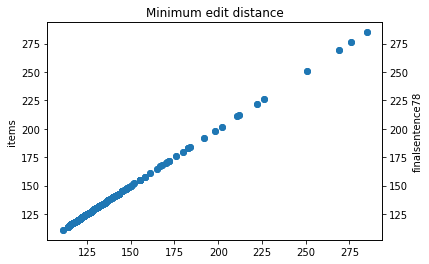

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots()

ax1.scatter(dis_list1, dis_list1)
ax2 = ax1.twinx()
ax2.scatter(dis_list1, dis_list1)

ax1.set_ylabel("items")
ax2.set_ylabel('finalsentence78')
plt.title('Minimum edit distance')

In [ ]:
pairs12 = a_list[0].split() #note that split without arguments splits on whitespace
pairs = [pairs12[i]+' '+pairs12[i+1] for i in range(len(pairs12)-1)]
print(pairs)

['Michael Howard,', 'Howard, the', 'the former', 'former Conservative', 'Conservative Party', 'Party leader,', 'leader, has', 'has told', 'told members', 'members of', 'of the', 'the cabinet', 'cabinet to', 'to consider', 'consider their', 'their positions', 'positions as', 'as he', 'he said', 'said that', 'that Boris', 'Boris Johnson', 'Johnson should', 'should resign.']


In [ ]:
import numpy as np
from scipy.stats import entropy
from math import log, e
import pandas as pd

import timeit

def entropy1(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  return entropy(counts, base=base)

def entropy2(labels, base=None):
  """ Computes entropy of label distribution. """

  n_labels = len(labels)

  if n_labels <= 1:
    return 0

  value,counts = np.unique(labels, return_counts=True)
  probs = counts / n_labels
  n_classes = np.count_nonzero(probs)

  if n_classes <= 1:
    return 0

  ent = 0.

  # Compute entropy
  base = e if base is None else base
  for i in probs:
    ent -= i * log(i, base)

  return ent

def entropy3(labels, base=None):
  vc = pd.Series(labels).value_counts(normalize=True, sort=False)
  base = e if base is None else base
  return -(vc * np.log(vc)/np.log(base)).sum()

def entropy4(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  norm_counts = counts / counts.sum()
  base = e if base is None else base
  return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()

labels = pairs

print(entropy1(labels))
print(entropy2(labels))
print(entropy3(labels))
print(entropy4(labels))

3.1780538303479453
3.178053830347946
3.1780538303479453
3.1780538303479453


In [ ]:
pairs13 = finalsentence78.split() #note that split without arguments splits on whitespace
pairs01 = [pairs13[i]+' '+pairs13[i+1] for i in range(len(pairs13)-1)]
print(pairs01)

['have provides', 'provides shared', 'shared purely', 'purely a', 'a identified', 'identified here', 'here and', 'and as', 'as the', 'the mechanisms', 'mechanisms the', 'the his', 'his I', 'I papers', 'papers at', 'at disagree', 'disagree here', 'here suggests', 'suggests to', 'to concluded', 'concluded are', 'are section', 'section next', 'next evaluation', 'evaluation publish', 'publish as']


In [ ]:
def entropyrandom(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  norm_counts = counts / counts.sum()
  base = e if base is None else base
  return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()

labels = pairs01

print(entropyrandom(labels))

3.2580965380214826


In [ ]:
splitingsentence = []
for item in a_list:
  pairsN1 = item.split() #note that split without arguments splits on whitespace
  pairsF1 = [pairsN1[i]+' '+pairsN1[i+1] for i in range(len(pairsN1)-1)]
  splitingsentence.append(pairsF1)

print(splitingsentence)

def entropyFL(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  norm_counts = counts / counts.sum()
  base = e if base is None else base
  return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()

entropyN = []
for item in splitingsentence:
  labels = item
  entropyN.append(entropyFL(labels))

print(entropyN)

[['Michael Howard,', 'Howard, the', 'the former', 'former Conservative', 'Conservative Party', 'Party leader,', 'leader, has', 'has told', 'told members', 'members of', 'of the', 'the cabinet', 'cabinet to', 'to consider', 'consider their', 'their positions', 'positions as', 'as he', 'he said', 'said that', 'that Boris', 'Boris Johnson', 'Johnson should', 'should resign.'], ['Howard —', '— who', 'who led', 'led the', 'the party', 'party from', 'from 2003', '2003 to', 'to 2005', '2005 in', 'in opposition', 'opposition and', 'and is', 'is now', 'now a', 'a peer,', 'peer, Lord', 'Lord Howard', 'Howard of', 'of Lympne', 'Lympne —', '— told', 'told World', 'World at', 'at One', 'One on', 'on BBC', 'BBC Radio', 'Radio 4:', '4: “The', '“The party', 'party and', 'and more', 'more importantly', 'importantly the', 'the country', 'country would', 'would be', 'be better', 'better off', 'off under', 'under new', 'new leadership.'], ['Members of', 'of the', 'the cabinet', 'cabinet should', 'should v

In [ ]:
counter = 0
for item in entropyN:
  counter = counter + 1
  size = len(entropyN)
print("the length is:"+ str(counter))

the length is:273


In [ ]:
print(safewordsnew1)

['the', 'former', 'leader', 'has', 'told', 'members', 'of', 'the', 'cabinet', 'to', 'consider', 'their', 'positions', 'as', 'he', 'said', 'that', 'should', 'resign', 'who', 'led', 'the', 'party', 'from', '2003', 'to', '2005', 'in', 'opposition', 'and', 'is', 'now', 'a', 'peer', 'of', 'told', 'at', 'One', 'on', '4', 'The', 'party', 'and', 'more', 'importantly', 'the', 'country', 'would', 'be', 'better', 'off', 'under', 'new', 'leadership', 'Members', 'of', 'the', 'cabinet', 'should', 'very', 'carefully', 'consider', 'their', 'positions', 'The', 'comments', 'will', 'add', 'further', 'pressure', 'to', 'the', 'prime', 'minister', 'after', 'resigned', 'as', 'chairman', 'this', 'morning', 'after', 'the', 'big', 'defeats', 'for', 'the', 'in', 'the', 'by', 'elections', 'in', 'and', '&', 'for', 'the', 'and', 'treasurer', 'of', 'the', '1922', 'of', 'backbenchers', 'urged', 'to', 'cut', 'short', 'his', 'visit', 'to', 'where', 'he', 'is', 'attending', 'the', 'summit', 'and', 'set', 'out', 'for', '

In [ ]:
import random

r1 = random.sample(safewordsnew1, 10)
r1join = " ".join(r1)
r2 = random.sample(safewordsnew1, 20)
r2join = " ".join(r2)
r3 = random.sample(safewordsnew1, 30)
r3join = " ".join(r3)
rsentlist = [r1join, r2join, r3join]
print(rsentlist)

splitrsentlist = []
for item in rsentlist:
  pairsR1 = item.split() #note that split without arguments splits on whitespace
  pairsFR1 = [pairsR1[i]+' '+pairsR1[i+1] for i in range(len(pairsR1)-1)]
  splitrsentlist.append(pairsFR1)

print(splitrsentlist)

def entropyRsentL(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  norm_counts = counts / counts.sum()
  base = e if base is None else base
  return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()

entropyRsent = []
for item in splitrsentlist:
  labels = item
  entropyRsent.append(entropyRsentL(labels))

print(entropyRsent)

['is those should and for party immigrants about its is', 'The synthesis analysis transmission any career parties putting packet However of the that for editing clings blockage of becoming could', 'provides for he and you to replace paints 1935 shared images that the submitted broken overnight packets not to & pornography down bags delivery significant has experience select to graphs']
[['is those', 'those should', 'should and', 'and for', 'for party', 'party immigrants', 'immigrants about', 'about its', 'its is'], ['The synthesis', 'synthesis analysis', 'analysis transmission', 'transmission any', 'any career', 'career parties', 'parties putting', 'putting packet', 'packet However', 'However of', 'of the', 'the that', 'that for', 'for editing', 'editing clings', 'clings blockage', 'blockage of', 'of becoming', 'becoming could'], ['provides for', 'for he', 'he and', 'and you', 'you to', 'to replace', 'replace paints', 'paints 1935', '1935 shared', 'shared images', 'images that', 'that 

In [ ]:
print(a_list[0])

Michael Howard, the former Conservative Party leader, has told members of the cabinet to consider their positions as he said that Boris Johnson should resign.


In [ ]:
import math
from math import log2

shentest = a_list[0]
def shannon(shentest):
        prob = [ float(shentest.count(c)) / len(shentest) for c in dict.fromkeys(list(shentest)) ]
        entropy = -sum([ p * math.log(p) / math.log(2.0) for p in prob ])
        return entropy
        
shannon(shentest)

4.192931746406664

In [ ]:
#language model::

phrase82 = "Michael Howard, the former Conservative Party leader, has told members of the cabinet to consider their positions as he said that Boris Johnson should resign."

singlepair = phrase82.split() #note that split without arguments splits on whitespace
print(singlepair)

#calculating Frequency
def generate_tokens_freq(singlepair):
    dct={}
    for i in singlepair:
        dct[i]=0
    for i in singlepair:
        dct[i]+=1
    return dct
dct=generate_tokens_freq(singlepair)
print("Frequency of each singlepair = ")
for i in dct.items():
    print(i[0],"\t:" , i[1])

#n-gram model generation

def generate_ngrams(singlepair,k):
    l=[]
    i=0
    while(i<len(singlepair)):
        l.append(singlepair[i:i+k])
        i=i+1
    l=l[:-1]
    return l
bigram = generate_ngrams(singlepair,2)
print("N-grams generated (Here n is 2) = ")
for i in bigram:
    print(i)

### frequecy of ngram

def generate_ngram_freq(bigram):
    dct1={}
    for i in bigram:
        st=" ".join(i)
        dct1[st]=0
    for i in bigram:
        st=" ".join(i)
        dct1[st]+=1
    return dct1
dct1=generate_ngram_freq(bigram)
print("Frequency of n-grams = ")
for i in dct1.items():
    print(i[0], ":", i[1])

def find1(s,dct1):
    try:
        return dct1[s]
    except:
        return 0
def print_probability_table(singlepair,dct,dct1):
    n=len(singlepair)
    l=[[]*n for i in range(n)]
    for i in range(n):
        denominator = dct[singlepair[i]]
        for j in range(n):
            numerator = find1(singlepair[i]+" "+singlepair[j],dct1)
            l[i].append(float("{:.3f}".format(numerator/denominator)))
    return l

print("Probability table = \n")
probability_table = print_probability_table(singlepair,dct,dct1)
n=len(singlepair)
print("\t", end="")
for i in range(n):
    print(singlepair[i],end="\t")
print("\n")
for i in range(n):
    print(singlepair[i],end="\t")
    for j in range(n):
        print(probability_table[i][j],end="\t")
    print("\n")

['Michael', 'Howard,', 'the', 'former', 'Conservative', 'Party', 'leader,', 'has', 'told', 'members', 'of', 'the', 'cabinet', 'to', 'consider', 'their', 'positions', 'as', 'he', 'said', 'that', 'Boris', 'Johnson', 'should', 'resign.']
Frequency of each singlepair = 
Michael 	: 1
Howard, 	: 1
the 	: 2
former 	: 1
Conservative 	: 1
Party 	: 1
leader, 	: 1
has 	: 1
told 	: 1
members 	: 1
of 	: 1
cabinet 	: 1
to 	: 1
consider 	: 1
their 	: 1
positions 	: 1
as 	: 1
he 	: 1
said 	: 1
that 	: 1
Boris 	: 1
Johnson 	: 1
should 	: 1
resign. 	: 1
N-grams generated (Here n is 2) = 
['Michael', 'Howard,']
['Howard,', 'the']
['the', 'former']
['former', 'Conservative']
['Conservative', 'Party']
['Party', 'leader,']
['leader,', 'has']
['has', 'told']
['told', 'members']
['members', 'of']
['of', 'the']
['the', 'cabinet']
['cabinet', 'to']
['to', 'consider']
['consider', 'their']
['their', 'positions']
['positions', 'as']
['as', 'he']
['he', 'said']
['said', 'that']
['that', 'Boris']
['Boris', 'Johnson

In [ ]:
print('\033[1m'+"Calculate bigram probability"+'\033[0m\n')
s=1
dct2={}
for i in bigram:
    dct2[" ".join(i)]=0
for i in bigram:
    k=singlepair.index(i[0])
    m=singlepair.index(i[1])
    dct2[" ".join(i)]=probability_table[k][m]
    print("P('{}')\t=  ".format(' '.join(i)),probability_table[k][m])
    s*=probability_table[k][m]

print("\n"+'\033[1m'+ "Calculate Probability of the sentence"+'\033[0m')
print(f"P('{phrase82}') \n= ",end="")
x=dct2.popitem()
for i in dct2:
    print(f"P('{i}')", end=" * ")
print(f"P('{x[0]}')\n= ", end='')

for i in dct2:
    print(dct2[i], end=" * ")
print(x[1],"\n=",s)

print("\n"+'\033[1m'+f"Probability('{phrase82}') = "+"{:.5f}".format(s))

Calculate bigram probability

P('Michael Howard,')	=   1.0
P('Howard, the')	=   1.0
P('the former')	=   0.5
P('former Conservative')	=   1.0
P('Conservative Party')	=   1.0
P('Party leader,')	=   1.0
P('leader, has')	=   1.0
P('has told')	=   1.0
P('told members')	=   1.0
P('members of')	=   1.0
P('of the')	=   1.0
P('the cabinet')	=   0.5
P('cabinet to')	=   1.0
P('to consider')	=   1.0
P('consider their')	=   1.0
P('their positions')	=   1.0
P('positions as')	=   1.0
P('as he')	=   1.0
P('he said')	=   1.0
P('said that')	=   1.0
P('that Boris')	=   1.0
P('Boris Johnson')	=   1.0
P('Johnson should')	=   1.0
P('should resign.')	=   1.0

Calculate Probability of the sentence
P('Michael Howard, the former Conservative Party leader, has told members of the cabinet to consider their positions as he said that Boris Johnson should resign.') 
= P('Michael Howard,') * P('Howard, the') * P('the former') * P('former Conservative') * P('Conservative Party') * P('Party leader,') * P('leader, has')

In [ ]:
prbtest12 = f" "+"{:.5f}".format(s)
print("Probability =", prbtest12)

entro121 = - sum([ float(prbtest12) * math.log(float(prbtest12)) / math.log(2.0) ])
print("Entropy =", entro121)

Probability =  0.25000
Entropy = 0.5


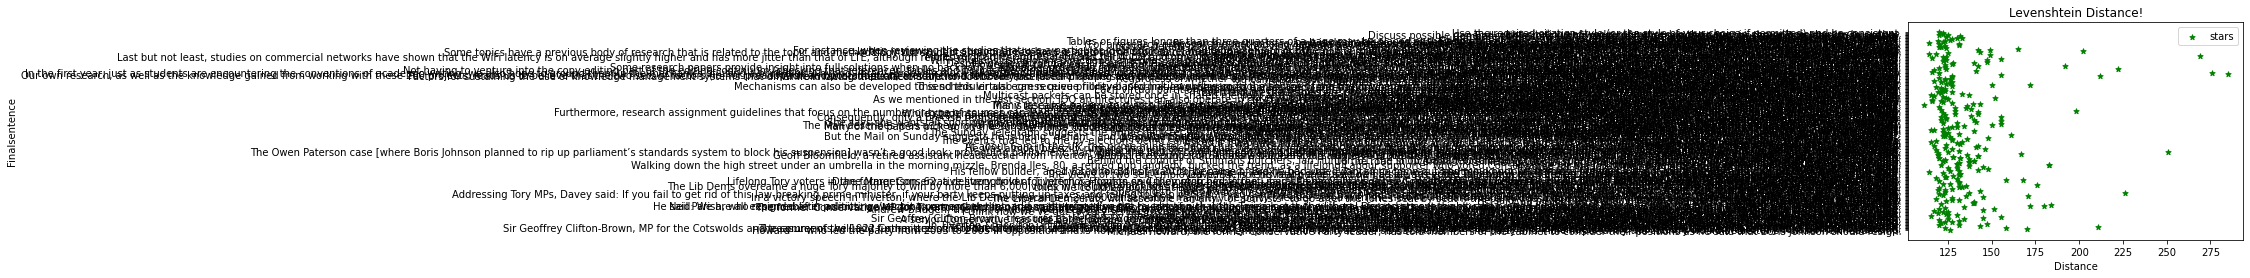

In [ ]:
import matplotlib.pyplot as plt



# x axis values
x = dis_list1
# corresponding y axis values
y = a_list

# plotting the points
plt.scatter(x, y, label= "stars", color= "green", 
            marker= "*", s=30)

# naming the x axis
plt.xlabel('Distance')
# naming the y axis
plt.ylabel('Finalsentence')

# giving a title to my graph
plt.title('Levenshtein Distance!')

plt.legend()

# function to show the plot
plt.show()

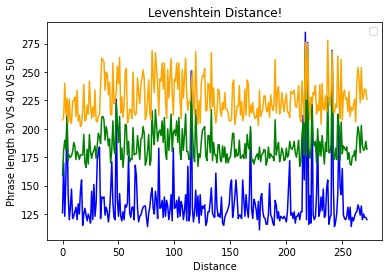

In [ ]:
import matplotlib.pyplot as plt



# x axis values
x = dis_list1
# corresponding y axis values
y = dis_list8
z = dis_list9
# plotting the points
plt.plot(x, color= "blue")
plt.plot(y, color= "green")
plt.plot(z, color= "orange")

# naming the x axis
plt.xlabel('Distance')
# naming the y axis
plt.ylabel('Phrase length 30 VS 40 VS 50')

# giving a title to my graph
plt.title('Levenshtein Distance!')

plt.legend()

# function to show the plot
plt.show()

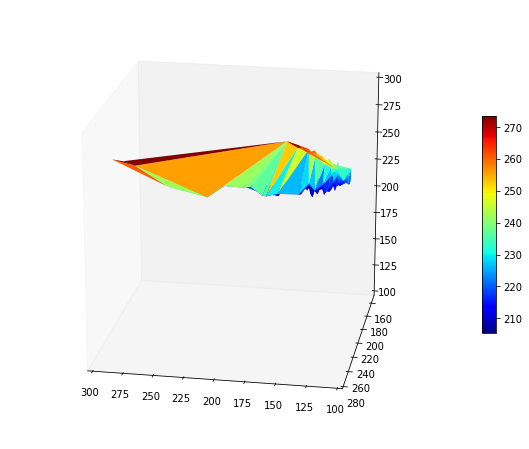

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

X = np.array(dis_list1)
Y = np.array(dis_list8)
Z = np.array(dis_list9)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(X, Y, Z, cmap=plt.cm.jet, linewidth=0.2)
fig.colorbar(surf, shrink=0.5, aspect=15)
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(X, Y, Z, marker="x", c="green", s=60)
ax.set_xlim(100,300)
#ax.set_xlabel("List of LD of size 30")
#ax.set_ylabel("List of LD of size 40")
#ax.set_zlabel("List of LD of size 50")
ax.set_ylim(150,280)
ax.set_zlim(100,300)
fig.set_size_inches(10, 8)
ax.grid(False)
#plt.show()

# Set the angle of the camera
ax.view_init(20,100)

#ax.view_init(30, 185)

In [ ]:
for item in a_list:
  #print(item.split())
  gramnew = generate_ngrams(item.split(),2)
  print("N-grams Generated = \n= ",gramnew)

N-grams Generated = 
=  [['Michael', 'Howard,'], ['Howard,', 'the'], ['the', 'former'], ['former', 'Conservative'], ['Conservative', 'Party'], ['Party', 'leader,'], ['leader,', 'has'], ['has', 'told'], ['told', 'members'], ['members', 'of'], ['of', 'the'], ['the', 'cabinet'], ['cabinet', 'to'], ['to', 'consider'], ['consider', 'their'], ['their', 'positions'], ['positions', 'as'], ['as', 'he'], ['he', 'said'], ['said', 'that'], ['that', 'Boris'], ['Boris', 'Johnson'], ['Johnson', 'should'], ['should', 'resign.']]
N-grams Generated = 
=  [['Howard', '—'], ['—', 'who'], ['who', 'led'], ['led', 'the'], ['the', 'party'], ['party', 'from'], ['from', '2003'], ['2003', 'to'], ['to', '2005'], ['2005', 'in'], ['in', 'opposition'], ['opposition', 'and'], ['and', 'is'], ['is', 'now'], ['now', 'a'], ['a', 'peer,'], ['peer,', 'Lord'], ['Lord', 'Howard'], ['Howard', 'of'], ['of', 'Lympne'], ['Lympne', '—'], ['—', 'told'], ['told', 'World'], ['World', 'at'], ['at', 'One'], ['One', 'on'], ['on', 'BBC'

In [ ]:
allngram = []
for item in a_list:
  #print(item.split())
  gramnew = generate_ngrams(item.split(),2)
  for item in gramnew:
    allngram.append(item)

print("N-grams Generated = \n= ",allngram)

N-grams Generated = 
=  [['Michael', 'Howard,'], ['Howard,', 'the'], ['the', 'former'], ['former', 'Conservative'], ['Conservative', 'Party'], ['Party', 'leader,'], ['leader,', 'has'], ['has', 'told'], ['told', 'members'], ['members', 'of'], ['of', 'the'], ['the', 'cabinet'], ['cabinet', 'to'], ['to', 'consider'], ['consider', 'their'], ['their', 'positions'], ['positions', 'as'], ['as', 'he'], ['he', 'said'], ['said', 'that'], ['that', 'Boris'], ['Boris', 'Johnson'], ['Johnson', 'should'], ['should', 'resign.'], ['Howard', '—'], ['—', 'who'], ['who', 'led'], ['led', 'the'], ['the', 'party'], ['party', 'from'], ['from', '2003'], ['2003', 'to'], ['to', '2005'], ['2005', 'in'], ['in', 'opposition'], ['opposition', 'and'], ['and', 'is'], ['is', 'now'], ['now', 'a'], ['a', 'peer,'], ['peer,', 'Lord'], ['Lord', 'Howard'], ['Howard', 'of'], ['of', 'Lympne'], ['Lympne', '—'], ['—', 'told'], ['told', 'World'], ['World', 'at'], ['at', 'One'], ['One', 'on'], ['on', 'BBC'], ['BBC', 'Radio'], ['Ra

In [ ]:
lsetl2 = "john do not like to play cricket"

token455 = lsetl2.split() #note that split without arguments splits on whitespace
print(token455)

gramnew87 = generate_ngrams(lsetl2.split(),2)
print("N-grams Generated = \n= ",gramnew87)

def generate_tokens_freq1(token455):
    dct09={}
    for i in token455:
        dct09[i]=0
    for i in token455:
        dct09[i]+=1
    return dct09
dct09=generate_tokens_freq1(token455)
print("Frequency of each singlepair is = ")
for i in dct09.items():
    print(i[0],"\t:" , i[1])

### frequecy of ngram

def generate_ngram_freq1(gramnew87):
    dct109 = {}
    for i in gramnew87:
        st=" ".join(i)
        dct109[st]=0
    for i in gramnew87:
        st=" ".join(i)
        dct109[st]+=1
    return dct109
dct109=generate_ngram_freq1(gramnew87)
print("Frequency of n-grams = ")
for i in dct109.items():
    print(i[0], ":", i[1])

def find1(s,dct109):
    try:
        return dct109[s]
    except:
        return 0
def print_probability_table(token455,dct09,dct109):
    n=len(token455)
    l=[[]*n for i in range(n)]
    for i in range(n):
        denominator = dct09[token455[i]]
        for j in range(n):
            numerator = find1(token455[i]+" "+token455[j],dct109)
            l[i].append(float("{:.3f}".format(numerator/denominator)))
    return l

print('\033[1m'+"Calculate gramnew87 probability"+'\033[0m\n')
t=1
dct99={}
for i in gramnew87:
    dct99[" ".join(i)]=0
for i in gramnew87:
    c=token455.index(i[0])
    d=token455.index(i[1])
    dct99[" ".join(i)]=probability_table[c][d]
    print("P('{}')\t=  ".format(' '.join(i)),probability_table[c][d])
    s*=probability_table[c][d]

print("Probability table2 = \n")
probability_table2 = print_probability_table(token455,dct09,dct109)
n=len(token455)
print("\t", end="")
for i in range(n):
    print(token455[i],end="\t")
print("\n")
for i in range(n):
    print(token455[i],end="\t")
    for j in range(n):
        print(probability_table[i][j],end="\t")
    print("\n")

print("\n"+'\033[1m'+ "Calculate Probability of the sentence"+'\033[0m')
print(f"P('{lsetl2}') \n= ",end="")
x101=dct99.popitem()
for i in dct99:
    print(f"P('{i}')", end=" * ")
print(f"P('{x101[0]}')\n= ", end='')

for i in dct99:
    print(dct99[i], end=" * ")
print(x101[1],"\n=",s)

print("\n"+'\033[1m'+f"Probability('{lsetl2}') = "+"{:.5f}".format(s))

['john', 'do', 'not', 'like', 'to', 'play', 'cricket']
N-grams Generated = 
=  [['john', 'do'], ['do', 'not'], ['not', 'like'], ['like', 'to'], ['to', 'play'], ['play', 'cricket']]
Frequency of each singlepair is = 
john 	: 1
do 	: 1
not 	: 1
like 	: 1
to 	: 1
play 	: 1
cricket 	: 1
Frequency of n-grams = 
john do : 1
do not : 1
not like : 1
like to : 1
to play : 1
play cricket : 1
Calculate gramnew87 probability

P('john do')	=   1.0
P('do not')	=   1.0
P('not like')	=   0.5
P('like to')	=   1.0
P('to play')	=   1.0
P('play cricket')	=   1.0
Probability table2 = 

	john	do	not	like	to	play	cricket	

john	0.0	1.0	0.0	0.0	0.0	0.0	0.0	

do	0.0	0.0	1.0	0.0	0.0	0.0	0.0	

not	0.0	0.0	0.0	0.5	0.0	0.0	0.0	

like	0.0	0.0	0.0	0.0	1.0	0.0	0.0	

to	0.0	0.0	0.0	0.0	0.0	1.0	0.0	

play	0.0	0.0	0.0	0.0	0.0	0.0	1.0	

cricket	0.0	0.0	0.0	0.0	0.0	0.0	0.0	


Calculate Probability of the sentence
P('john do not like to play cricket') 
= P('john do') * P('do not') * P('not like') * P('like to') * P('to pla

In [ ]:
import random
rndwrd67 = random.sample(safewordsnew1, 10)
print(rndwrd67)

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import wordnet as wn

pos_all = dict()
for w in rndwrd67:
    pos_l = set()
    for tmp in wn.synsets(w):
        if tmp.name().split('.')[0] == w:
            pos_l.add(tmp.pos())
    pos_all[w] = pos_l
print(pos_all)

#for item in rndwrd67:
#    tagginglistwords = wn.synsets(item)[0].pos()
#    print(item, ":", tagginglistwords)

['an', 'a', 'goes', 'the', 'in', 'active', 'their', 'by', 'in', 'he']


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


{'an': set(), 'a': {'n'}, 'goes': set(), 'the': set(), 'in': {'r', 's'}, 'active': {'a', 'n', 's'}, 'their': set(), 'by': {'r'}, 'he': {'n'}}
